# Initialization (GRASS GIS, Drive)

In [ ]:
# Imports
import os
import sys
import subprocess
from multiprocessing import cpu_count
from google.colab import drive

# Mount drive
drive.mount('/content/drive')
data = '/content/drive/Shareddrives/CNR - Land & Climate Change/FUTURES_Flooding_Prototype'
location = os.path.join(data, 'grassdata', 'albers')

# Install GRASS
!sudo add-apt-repository -y ppa:ubuntugis/ubuntugis-unstable
!sudo apt -qq update
!sudo apt install -y grass grass-dev

# Download and import helper functions
# eventually will be replaced by Caitlin's GSoC 
!wget -q -O helper.py https://raw.githubusercontent.com/ncsu-landscape-dynamics/futures-model-intro-notebook/main/helper.py
from helper import initialize_GRASS_notebook, show_interactively, adjust_futures_colors

# Setup database (PERMANENT from drive and new mapset locally)
!mkdir -p /content/grassdata/albers
!ln -s "{location}/PERMANENT/" /content/grassdata/albers/

# Create new mapset 'test' (locally, will be deleted when connection dies)
mapset = 'test'
!grass /content/grassdata/albers/{mapset} -c -e
initialize_GRASS_notebook('grass', '/content/grassdata', 'albers', mapset)
!g.extension r.sample.category
!g.extension r.object.geometry
import grass.script as gs

# compile latest version of FUTURES:
!rm -rf futures.zip GRASS_FUTURES-redevelopment-abandonment/
!wget -q -O futures.zip https://github.com/ncsu-landscape-dynamics/GRASS_FUTURES/archive/redevelopment-abandonment.zip
!unzip -q futures.zip
!g.extension r.futures url=GRASS_FUTURES-redevelopment-abandonment/r.futures/



Mounted at /content/drive
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [80.4 kB]
Get:12 http

In [ ]:
%load_ext rpy2.ipython


In [ ]:
%%R
install.packages(c("optparse", "MuMIn", "lme4", "snow"))

R[write to console]: Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘getopt’, ‘minqa’, ‘nloptr’, ‘RcppEigen’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/getopt_1.20.3.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 18573 bytes (18 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[

## Demand

In [ ]:

demand = f'{data}/Scenarios_of_Fidelity/inputs/demand'
!r.mask roads_nlcd_2008 -i --o
!r.futures.demand development=urban_2001,urban_2004,urban_2006,urban_2008 subregions=subregions observed_population="{demand}/observed_population_counties_NLCD_2001-2008.csv" \
    projected_population="{demand}/Hauer_2009_2100_counties_SSP2_projections_demand.csv" simulation_times=`seq -s , 2008 2100` demand="{demand}/demand_2008.csv" \
    plot="{demand}/demand_2008.png" pop_demand="{demand}/pop_demand_2008.csv" method=logarithmic --o
!r.mask roads_nlcd_2011 -i --o
!r.futures.demand development=urban_2001,urban_2004,urban_2006,urban_2008,urban_2011 subregions=subregions observed_population="{demand}/observed_population_counties_NLCD_2001-2011.csv" \
    projected_population="{demand}/Hauer_2012_2100_counties_SSP2_projections_demand.csv" simulation_times=`seq -s , 2011 2100` demand="{demand}/demand_2011.csv" \
    plot="{demand}/demand_2011.png" pop_demand="{demand}/pop_demand_2011.csv" method=logarithmic --o
!r.mask roads_nlcd_2019 -i --o
!r.futures.demand development=urban_2001,urban_2004,urban_2006,urban_2008,urban_2011,urban_2013,urban_2016,urban_2019 subregions=subregions \
    observed_population="{demand}/observed_population_counties_NLCD_2001-2019.csv" \
    projected_population="{demand}/Hauer_2020_2100_counties_SSP2_projections_demand.csv" simulation_times=`seq -s , 2019 2100` demand="{demand}/demand_2019.csv" \
    plot="{demand}/demand_2019.png" pop_demand="{demand}/pop_demand_2019.csv" method=logarithmic --o
!r.mask -r



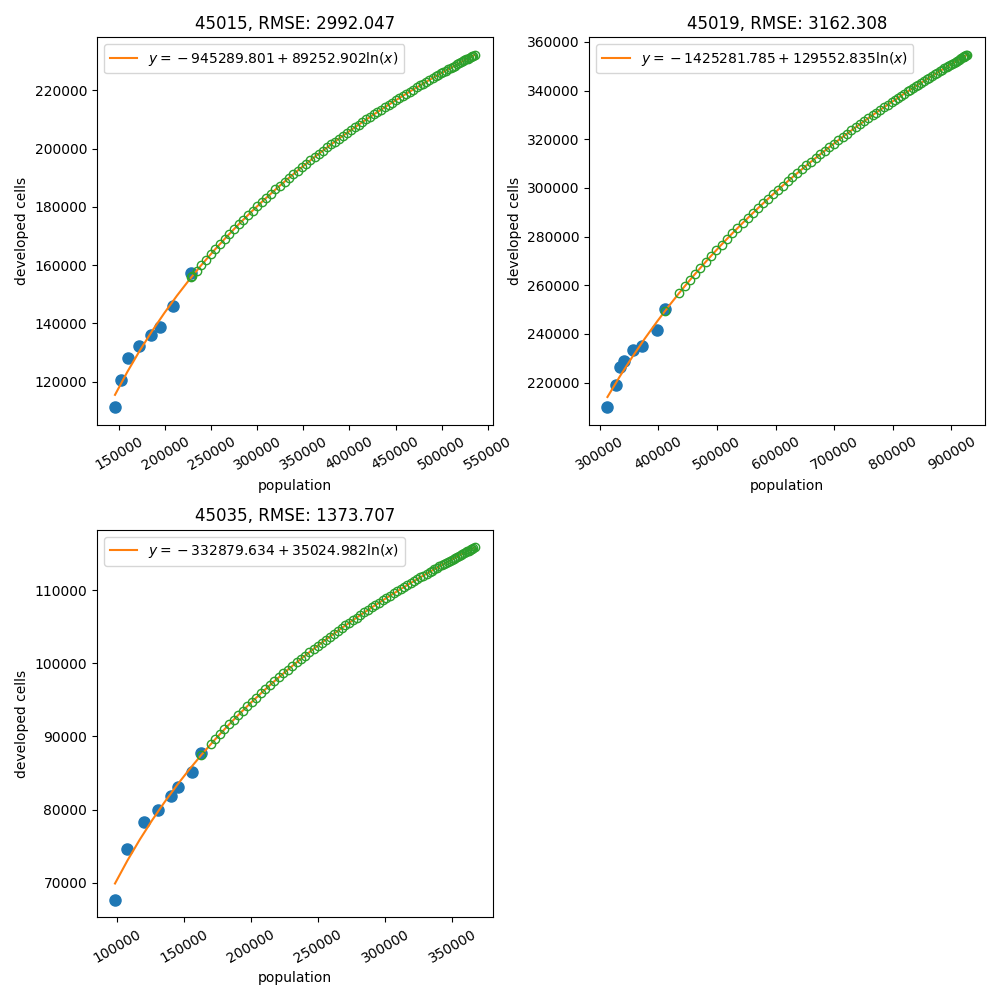

In [ ]:
from IPython.display import Image
Image(f'{demand}/demand_2019.png')


# Potential

In [ ]:
%%bash
maps=`g.list typ=raster mapset=PERMANENT patt="svi_2*,crop_production_average_log,devpressure*,dist_to_*log,slope_log,subregions,wetland*" sep=comma`
r.mask masking_2019 --o
r.sample.category input=urban_change_01_19 output=samples_01_19 npoints=6000,4000 random_seed=1 sampled=${maps}
r.sample.category input=urban_change_08_19 output=samples_08_19 npoints=6000,4000 random_seed=1 sampled=${maps}
r.sample.category input=urban_change_11_19 output=samples_11_19 npoints=6000,4000 random_seed=1 sampled=${maps}
r.mask masking_2011 --o
r.sample.category input=urban_change_01_08 output=samples_01_08 npoints=6000,4000 random_seed=1 sampled=${maps}
r.mask masking_2008 --o
r.sample.category input=urban_change_01_11 output=samples_01_11 npoints=6000,4000 random_seed=1 sampled=${maps}
r.mask -r

In [ ]:
potential = f'{data}/Scenarios_of_Fidelity/inputs/potential'
!r.futures.potential input=samples_01_19 output="{potential}/potential_01_19.csv" developed_column=urban_change_01_19 subregions_column=subregions \
   columns=svi_2018,crop_production_average_log,dist_to_forest_2019_log,dist_to_roads_2016_log,slope_log,wetland_2019_density_15 \
   random=devpressure_noroads_2019_15_10
!r.futures.potential input=samples_01_08 output="{potential}/potential_01_08.csv" developed_column=urban_change_01_08 subregions_column=subregions \
   columns=svi_2018,crop_production_average_log,dist_to_forest_2008_log,dist_to_roads_2011_log,slope_log,wetland_2008_density_15 \
   random=devpressure_noroads_2008_15_10
!r.futures.potential input=samples_01_11 output="{potential}/potential_01_11.csv" developed_column=urban_change_01_11 subregions_column=subregions \
   columns=svi_2018,crop_production_average_log,dist_to_forest_2011_log,dist_to_roads_2011_log,slope_log,wetland_2011_density_15 \
   random=devpressure_noroads_2011_15_10


## Calibration

In [ ]:
local = False
if local:
    inputs = '/home/akratoc/Projects/FUTURES/colab'
else:
    inputs = f'{data}/Scenarios_of_Fidelity/inputs'
demand = f'{inputs}/demand/demand_2019.csv'
potential = f'{inputs}/potential/potential_01_19.csv'
patch_sizes = f'{inputs}/patches/patches_01_19.csv'
calibration = f'{inputs}/patches/calibration_01_19.csv'
!r.mask masking_2019
!r.futures.calib -s development_start=urban_2001 development_end=urban_2019 subregions=subregions num_steps=39 \
predictors=svi_2018,crop_production_average_log,dist_to_forest_2019_log,dist_to_roads_2016_log,slope_log,wetland_2019_density_15 \
devpot_params="{potential}" development_pressure=devpressure_noroads_2019_15_10 n_dev_neighbourhood=10 development_pressure_approach=gravity gamma=1.5 scaling_factor=1 \
demand="{demand}" seed_search=probability num_neighbors=4 random_seed=1 \
patch_threshold=1800 discount_factor=0.5,0.8,1 compactness_mean=0,0.2,0.4,0.6,0.8,1 compactness_range=0.05,0.2  patch_sizes="{patch_sizes}" repeat=10 nprocs=20 calib_results="{calibration}" --o
!r.mask -r


demand = f'{inputs}/demand/demand_2008.csv'
potential = f'{inputs}/potential/potential_01_08.csv'
patch_sizes = f'{inputs}/patches/patches_01_08.csv'
calibration = f'{inputs}/patches/calibration_01_08.csv'
!r.mask masking_2008
!r.futures.calib -s development_start=urban_2001 development_end=urban_2008 subregions=subregions num_steps=39 \
predictors=svi_2018,crop_production_average_log,dist_to_forest_2008_log,dist_to_roads_2011_log,slope_log,wetland_2008_density_15 \
devpot_params="{potential}" development_pressure=devpressure_noroads_2008_15_10 n_dev_neighbourhood=10 development_pressure_approach=gravity gamma=1.5 scaling_factor=1 \
demand="{demand}" seed_search=probability num_neighbors=4 random_seed=1 \
patch_threshold=1800 discount_factor=0.5,0.8,1 compactness_mean=0,0.2,0.4,0.6,0.8,1 compactness_range=0.05,0.2  patch_sizes="{patch_sizes}" repeat=10 nprocs=20 calib_results="{calibration}" --o
!r.mask -r

demand = f'{inputs}/demand/demand_2011.csv'
potential = f'{inputs}/potential/potential_01_11.csv'
patch_sizes = f'{inputs}/patches/patches_01_11.csv'
calibration = f'{inputs}/patches/calibration_01_11.csv'
!r.mask masking_2011
!r.futures.calib -s development_start=urban_2001 development_end=urban_2011 subregions=subregions num_steps=39 \
predictors=svi_2018,crop_production_average_log,dist_to_forest_2011_log,dist_to_roads_2011_log,slope_log,wetland_2011_density_15 \
devpot_params="{potential}" development_pressure=devpressure_noroads_2011_15_10 n_dev_neighbourhood=10 development_pressure_approach=gravity gamma=1.5 scaling_factor=1 \
demand="{demand}" seed_search=probability num_neighbors=4 random_seed=1 \
patch_threshold=1800 discount_factor=0.5,0.8,1 compactness_mean=0,0.2,0.4,0.6,0.8,1 compactness_range=0.05,0.2  patch_sizes="{patch_sizes}" repeat=10 nprocs=20 calib_results="{calibration}" --o
!r.mask -r

In [ ]:
inputs = f'{data}/Scenarios_of_Fidelity/inputs'
with open(f'{inputs}/patches/calibration_01_08.csv') as f:
    disc_08, comp_mean_08, comp_range_08 = f.readlines()[1].strip().split(",")[:3]
with open(f'{inputs}/patches/calibration_01_11.csv') as f:
    disc_11, comp_mean_11, comp_range_11 = f.readlines()[1].strip().split(",")[:3]
with open(f'{inputs}/patches/calibration_01_19.csv') as f:
    disc_19, comp_mean_19, comp_range_19 = f.readlines()[1].strip().split(",")[:3]

# Running FUTURES for validation (2008 - 2019)

In [ ]:
inputs = f'{data}/Scenarios_of_Fidelity/inputs'
demand = f'{inputs}/demand/demand_2008.csv'
potential = f'{inputs}/potential/potential_01_08.csv'
patch_sizes = f'{inputs}/patches/patches_01_08.csv'
output = 'output_2019'

n = 20

!r.mask masking_2008
!r.futures.parallelpga --v nprocs=2 repeat={n} developed=urban_2008 subregions=subregions output={output} num_steps=11 \
predictors=svi_2018,crop_production_average_log,dist_to_forest_2008_log,dist_to_roads_2011_log,slope_log,wetland_2008_density_15 \
devpot_params="{potential}" development_pressure=devpressure_noroads_2008_15_10 n_dev_neighbourhood=10 development_pressure_approach=gravity gamma=1.5 scaling_factor=1 \
demand="{demand}" discount_factor=1 compactness_mean="{comp_mean_08}" compactness_range="{comp_range_08}" num_neighbors=4 seed_search=probability patch_sizes="{patch_sizes}" random_seed=1
!r.mask -r


All subsequent raster operations will be limited to the MASK area. Removing
or renaming raster map named 'MASK' will restore raster operations to
normal.
Running simulation 4/20
Running simulation 1/20
Read random seed from random_seed option: 4
Number of segments in memory: 4575 of 4575 total
Estimated minimum memory footprint without using disk cache: 682 MB
Reading input rasters...
Read random seed from random_seed option: 1
Number of segments in memory: 4575 of 4575 total
Estimated minimum memory footprint without using disk cache: 682 MB
Reading input rasters...
Using memory cache
Using memory cache
Using memory cache
Using memory cache
Using memory cache
Using memory cache
   0%   0%   6%   6%  12%  12%  18%  18%  24%  24%  30%  30%  36%  36%  42%  42%  48%  48%  54%  54%  60%  60%  66%  66%  72%  72%  78%  78%  84%  84%  90%  

# Visualization

In [ ]:
show_interactively(adjust_futures_colors('output_19_run1'))

# Validation

In [ ]:
%%writefile rules.txt
-1 = 0
0 thru 100 = 1

Overwriting rules.txt


In [ ]:
import json
metrics = []
!r.mask masking_2008_roads --o
for i in range(1, n + 1):
    !r.reclass input=output_19_run{i} output=output_19_run{i}_reclass rules=rules.txt --o
    metrics.append(json.loads(gs.read_command('r.futures.validation', simulated=f'output_19_run{i}_reclass', reference='urban_2019', original='urban_2008', format='json')))
!r.mask -r


All subsequent raster operations will be limited to the MASK area. Removing
or renaming raster map named 'MASK' will restore raster operations to
normal.
ERROR: Raster map <output_19_run1> not found


ERROR: Raster map <output_19_run1_reclass> not found
Traceback (most recent call last):
  File "/root/.grass7/addons/scripts/r.futures.validation", line 228, in <module>
    sys.exit(main())
  File "/root/.grass7/addons/scripts/r.futures.validation", line 223, in main
    cats, results = compute(reference, simulated, original)
  File "/root/.grass7/addons/scripts/r.futures.validation", line 135, in compute
    data = gs.read_command("r.stats", flags="cn", input=input_maps).strip()
  File "/usr/lib/grass78/etc/python/grass/script/core.py", line 503, in read_command
    return handle_errors(returncode, stdout, args, kwargs)
  File "/usr/lib/grass78/etc/python/grass/script/core.py", line 343, in handle_errors
    returncode=returncode)
grass.exceptions.CalledModuleError: Module run None r.stats -cn input=urban_2008,urban_2019,output_19_run1_reclass ended with error
Process ended with non-zero return code 1. See errors in the (error) output.


CalledModuleError: ignored

In [ ]:
 fimport numpy as np
{k: np.mean([dic[k] for dic in metrics]) for k in metrics[0]}

{'allocation_class_0': 0.026464999999999995,
 'allocation_class_1': 0.026464999999999995,
 'kappa': 0.8266349999999999,
 'kappasimulation': 0.424565,
 'quantity_class_0': 0.0049,
 'quantity_class_1': 0.0049,
 'total_allocation': 0.026464999999999995,
 'total_quantity': 0.0049}

# Running FUTURES to 2050

In [ ]:
inputs = f'{data}/Scenarios_of_Fidelity/inputs'
demand = f'{inputs}/demand/demand_2019.csv'
potential = f'{inputs}/potential/potential_01_19.csv'
patch_sizes = f'{inputs}/patches/patches_01_19.csv'
output = 'output_2050'

n = 50

#!r.mask masking_2019
!r.mask masking_2019_roads
!r.futures.parallelpga --v nprocs=2 repeat={n} developed=urban_2019 subregions=subregions output={output} num_steps=31 \
predictors=svi_2018,crop_production_average_log,dist_to_forest_2019_log,dist_to_roads_2016_log,slope_log,wetland_2019_density_15 \
devpot_params="{potential}" development_pressure=devpressure_noroads_2019_15_10 n_dev_neighbourhood=10 development_pressure_approach=gravity gamma=1.5 scaling_factor=1 \
demand="{demand}" discount_factor=1 compactness_mean="{comp_mean_19}" compactness_range="{comp_range_19}" num_neighbors=4 seed_search=probability patch_sizes="{patch_sizes}" random_seed=1
!r.mask -r

All subsequent raster operations will be limited to the MASK area. Removing
or renaming raster map named 'MASK' will restore raster operations to
normal.
Running simulation 1/50
Running simulation 8/50
Read random seed from random_seed option: 8
Number of segments in memory: 4575 of 4575 total
Estimated minimum memory footprint without using disk cache: 682 MB
Reading input rasters...
Read random seed from random_seed option: 1
Number of segments in memory: 4575 of 4575 total
Estimated minimum memory footprint without using disk cache: 682 MB
Reading input rasters...
Using Usingmemory cache
 memory cache
Using memory cache
Using memory cache
Using memory cache
Using memory cache
   0%   0%   6%   6%  12%  12%  18%  18%  24%  24%  30%  30%  36%  36%  42%  42%  48%  48%  54%  54%  60%  60%  66%  66%  72%  72%  78%  78%  84%  84%  90%  

# Upload to drive

In [ ]:
# List layers to export
to_export = !g.list type=raster mapset=. pattern="{output}*" exclude="{output_series}*"
# Where on Drive to put them
where = f'{data}/Scenarios_of_Fidelity/DynamicUrban_StaticGeophysical/futures_output_2019'
# Export to tif locally and then copy to Drive
for each in to_export:
    print(f"Exporting {each}.tif to {where}...")
    !r.out.gdal -c input={each} output={each}.tif type=Int16 format=GTiff --q
    !cp {each}.tif "{where}"
    !rm {each}.tif

Exporting output_2050_run1.tif to /content/drive/Shareddrives/CNR - Land & Climate Change/FUTURES_Flooding_Prototype/Scenarios_of_Fidelity/DynamicUrban_StaticGeophysical/futures_output_2019...
Exporting output_2050_run10.tif to /content/drive/Shareddrives/CNR - Land & Climate Change/FUTURES_Flooding_Prototype/Scenarios_of_Fidelity/DynamicUrban_StaticGeophysical/futures_output_2019...
Exporting output_2050_run11.tif to /content/drive/Shareddrives/CNR - Land & Climate Change/FUTURES_Flooding_Prototype/Scenarios_of_Fidelity/DynamicUrban_StaticGeophysical/futures_output_2019...
Exporting output_2050_run12.tif to /content/drive/Shareddrives/CNR - Land & Climate Change/FUTURES_Flooding_Prototype/Scenarios_of_Fidelity/DynamicUrban_StaticGeophysical/futures_output_2019...
Exporting output_2050_run13.tif to /content/drive/Shareddrives/CNR - Land & Climate Change/FUTURES_Flooding_Prototype/Scenarios_of_Fidelity/DynamicUrban_StaticGeophysical/futures_output_2019...
Exporting output_2050_run14.tif